<a href="https://colab.research.google.com/github/Jake0925/Seaborn/blob/master/SeabornAll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk') # context - 폰트

titatic = sns.load_dataset('titanic')
diamonds = sns.load_dataset('diamonds')
penguins = sns.load_dataset("penguins")
excercise = sns.load_dataset("exercise")
tips= sns.load_dataset('tips')

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
112,38.07,4.0,Male,No,Sun,Dinner,3


In [70]:
tips.day.value_counts()  # day항목은 결과종류별로 몇개씩 있는지 확인가능

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [3]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
tips[tips['day'] == 'Sun'].describe()

,total_bill,tip,size
count,76.000000,76.000000,76.000000
mean,21.410000,3.255132,2.842105
std,8.832122,1.234880,1.007341
min,7.250000,1.010000,2.000000
25%,14.987500,2.037500,2.000000
50%,19.630000,3.150000,2.000000
75%,25.597500,4.000000,4.000000
max,48.170000,6.500000,6.000000


In [6]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [7]:
tips[tips['smoker'] == 'Yes'].corr()

,total_bill,tip,size
total_bill,1.000000,0.488218,0.527890
tip,0.488218,1.000000,0.332227
size,0.527890,0.332227,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


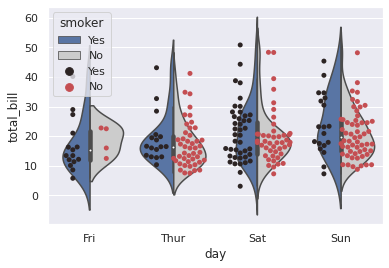

In [61]:
sns.violinplot(data=tips, x = 'day', y = 'total_bill', hue='smoker',
               order=['Fri', 'Thur', 'Sat', 'Sun'],
               split=True, palette={'Yes':'b', 'No':'0.8'})

sns.swarmplot(data=tips, x='day', y = 'total_bill', hue='smoker',
              order=['Fri', 'Thur', 'Sat', 'Sun'],
              split=True, color='r')

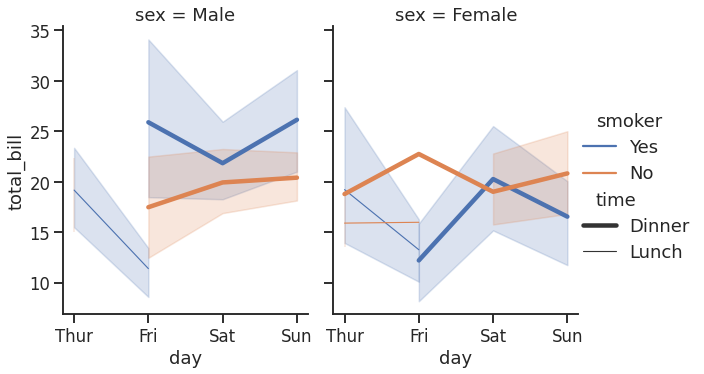

In [9]:
sns.relplot(data=tips, x='day', y = 'total_bill', hue = 'smoker', kind ='line',
            col='sex', 
            size='time', size_order=["Dinner", "Lunch"],
            legend='full',
            height=5, aspect=.8, facet_kws=dict(sharex=False))

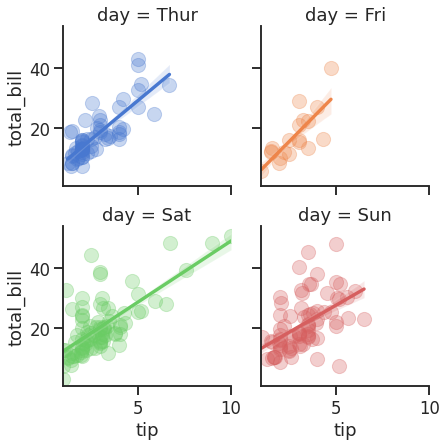

In [10]:
sns.lmplot(data=tips, x = 'tip', y='total_bill', hue='day',
           col='day', col_wrap=2, # Day기준으로 그래푸 따로 그리고 수평방향으로 2개씩만 그래프 표시
           height = 3, # 그래프 크기설정
           ci=70, # 신뢰구간범위설정
           palette='muted',
           scatter_kws={'s': 200, 'alpha': 0.3}) # 점크기와 농도조절

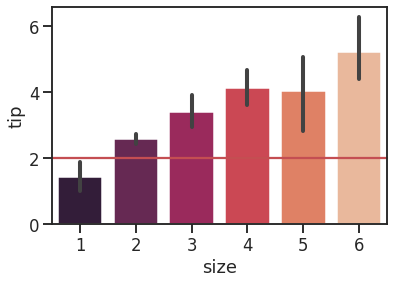

In [11]:
sns.barplot(data = tips, x='size', y ='tip', palette='rocket').axhline(2, color='r', clip_on=False)

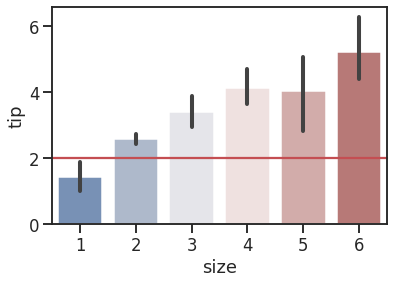

In [12]:
sns.barplot(data = tips, x='size', y ='tip', palette='vlag').axhline(2, color='r', clip_on=False)

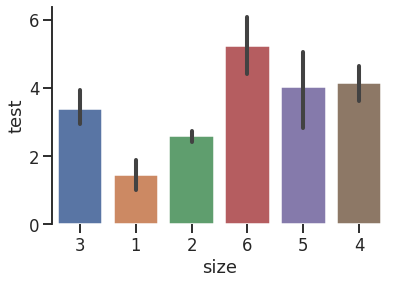

In [13]:
sns.barplot(data = tips, x='size', y ='tip', order=[3,1,2,6,5,4]).set_ylabel('test') # y축 label이름
sns.despine(bottom=True) # 그래프 박스외곽부의 상하라인 제거

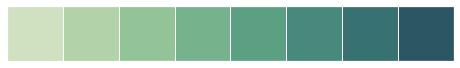

In [64]:
pal = sns.cubehelix_palette(8, rot=-.5, dark=.3)
sns.palplot(pal) # pal수치값을 palplot을통해 이미지로 표현

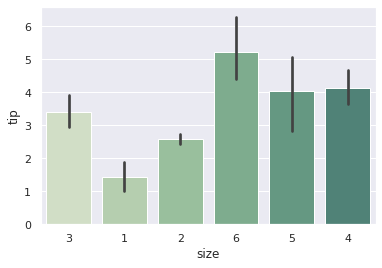

In [65]:
sns.barplot(data = tips, x='size', y ='tip', order=[3,1,2,6,5,4], palette = pal)

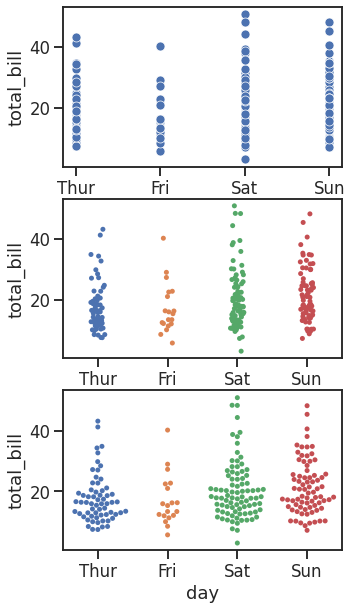

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,10))

sns.scatterplot(data=tips, x='day', y='total_bill', ax=ax[0])
sns.stripplot(data=tips, x='day', y='total_bill', ax=ax[1])
sns.swarmplot(data=tips, x='day', y='total_bill', ax=ax[2])

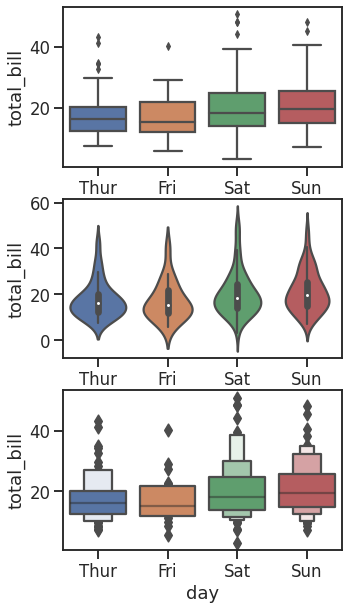

In [68]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,10))
sns.boxplot(data=tips, x = 'day', y = 'total_bill', ax = ax[0]) # Box안의 가운데 수평선은 중앙값을 나타낸다
sns.violinplot(data=tips, x='day', y='total_bill', ax=ax[1])
sns.boxenplot(data=tips, x='day', y='total_bill', ax=ax[2])

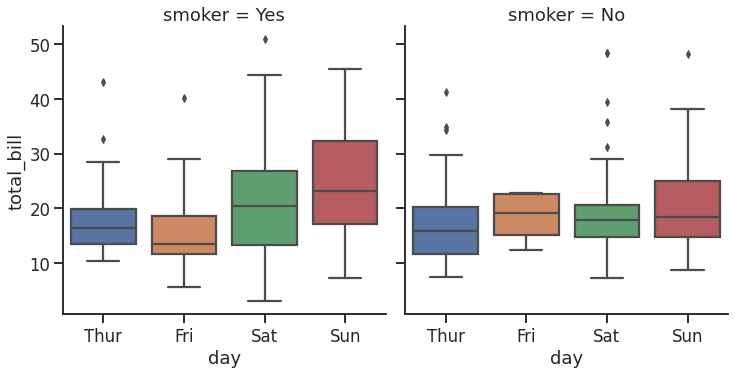

In [16]:
sns.catplot(data=tips, x='day', y='total_bill',
            col = 'smoker',
            kind = 'box')

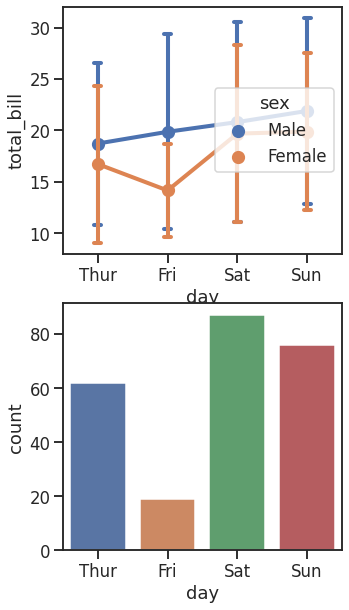

In [82]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,10))
sns.pointplot(data=tips, x='day', y ='total_bill',hue = 'sex', ax=ax[0],
              capsize=0.1, # 구간표시되는 수평선의 길이
              ci='sd') # 표준편차
sns.countplot(data=tips, x= 'day', ax=ax[1])

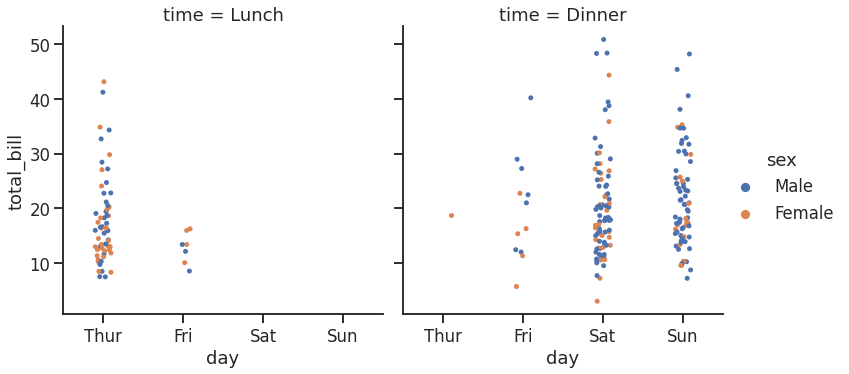

In [18]:
sns.catplot(data=tips, x = 'day', y='total_bill', hue = 'sex',
            col='time')

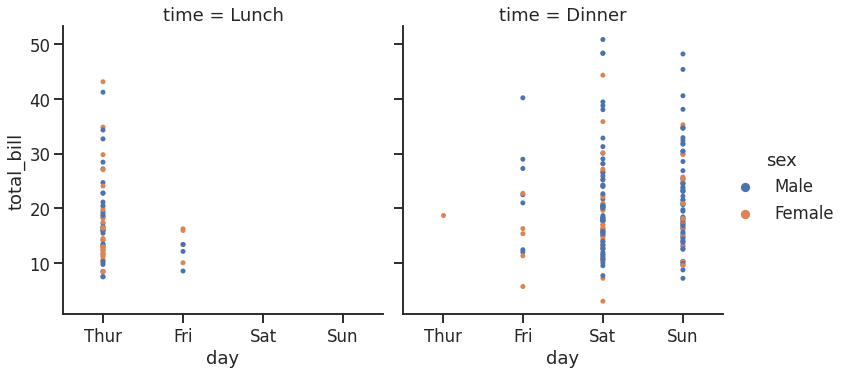

In [19]:
sns.catplot(data=tips, x = 'day', y='total_bill', col='time', hue ='sex',
            jitter=False)

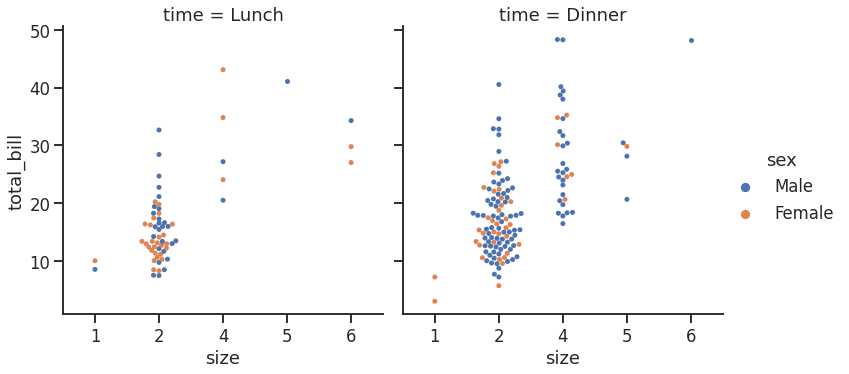

In [20]:
sns.catplot(data=tips.query('size != 3'), x = 'size', y='total_bill', hue= 'sex', # 값이 3인항목제거
            col='time',
            kind= 'swarm',)

In [21]:
dayGroup = tips.groupby(['day'])['total_bill'].describe()
dayGroup

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


In [22]:
Thur = dayGroup.loc['Thur']
Thur

count    62.000000
mean     17.682742
std       7.886170
min       7.510000
25%      12.442500
50%      16.200000
75%      20.155000
max      43.110000
Name: Thur, dtype: float64

In [23]:
IQR = Thur['75%'] - Thur['25%']
Thur_min = Thur['25%'] - (1.5 * IQR)
Thur_max = Thur['75%'] - (1.5 * IQR)
IQR, Thur_min, Thur_max

(7.712500000000002, 0.8737499999999958, 8.586249999999998)

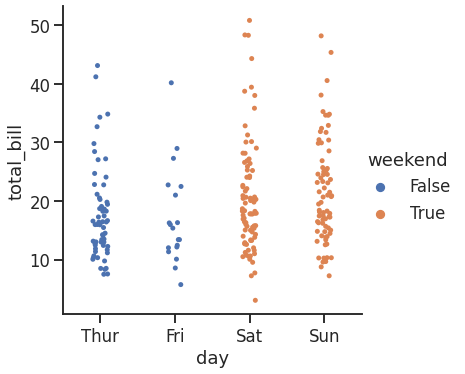

In [24]:
# 주말만 다르게 색칠
tips['weekend'] = tips['day'].isin(['Sat', 'Sun']) # day가 Sat, Sun에 해당하면 True
sns.catplot(data=tips, x='day', y= 'total_bill', hue='weekend')

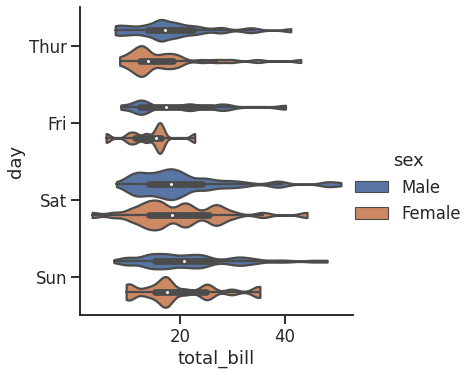

In [25]:
sns.catplot(data=tips, x='total_bill', y='day', hue='sex',
            kind='violin',
            cut=0,bw=.15)

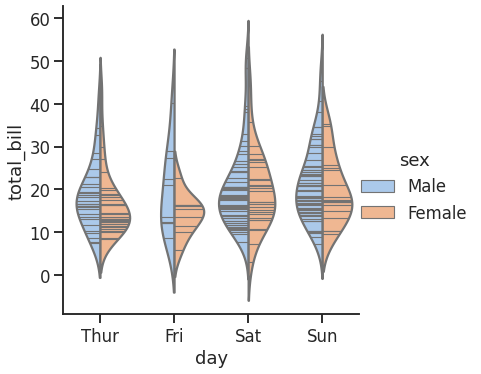

In [26]:
sns.catplot(data=tips, x='day', y = 'total_bill', hue='sex', palette='pastel',
            kind='violin',
            split=True,
            inner='stick') # inner의 설정에 따라 내부의 막대표시변경, ex) point. box, quart(사분위수표시) 

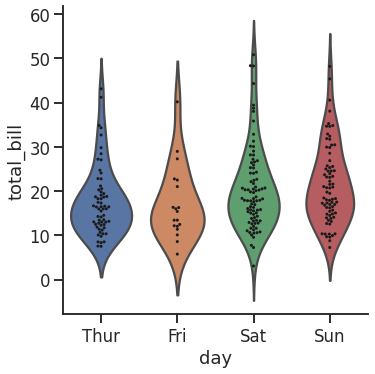

In [27]:

g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips)

Line plot

In [31]:
rs= np.random.RandomState(365)
data = rs.randn(365,4).cumsum(axis=0)
pd.DataFrame(data)

,0,1,2,3
0,0.167921,0.523505,0.817376,1.703846
1,-1.979026,1.237704,0.057230,2.743267
2,-2.945478,1.094025,1.628355,2.359988
3,-2.307479,0.749367,1.624072,2.518347
4,-3.270573,0.333310,1.867085,2.866550
...,...,...,...,...
360,-19.091161,11.538091,-12.324271,15.728471
361,-19.896686,9.886417,-11.185668,16.971170
362,-20.162153,9.466580,-10.388869,17.955768
363,-20.322964,9.636551,-7.977325,19.397242


In [32]:
data_day = pd.date_range('1 1 2021', periods=365, freq='D')
data_day

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [36]:
data=pd.DataFrame(data, data_day, columns=["A", 'B', 'C','D'])
data

,A,B,C,D
2021-01-01,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-12-27,-18.482826,10.330142,-12.108625,14.878444
2021-12-28,-18.693797,10.391382,-12.020502,15.376387
2021-12-29,-18.752957,10.062616,-11.685921,15.996722
2021-12-30,-18.918042,9.957435,-11.244617,16.669990


In [35]:
data=data.rolling(7).mean() # 7간격으로 이동평균값을 찍는다
data

,A,B,C,D
2021-01-01,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-12-27,-18.482826,10.330142,-12.108625,14.878444
2021-12-28,-18.693797,10.391382,-12.020502,15.376387
2021-12-29,-18.752957,10.062616,-11.685921,15.996722
2021-12-30,-18.918042,9.957435,-11.244617,16.669990


In [47]:
sns.set_theme(style='darkgrid')

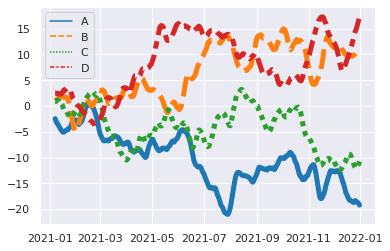

In [48]:
sns.lineplot(data = data, palette='tab10', linewidth = 5)

Pairplot

In [40]:
tips.groupby(['day']).mean() # 요일에따른 평균값출력

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


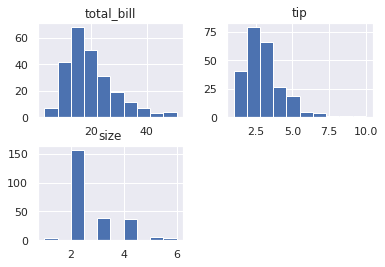

In [45]:
h = tips.hist()

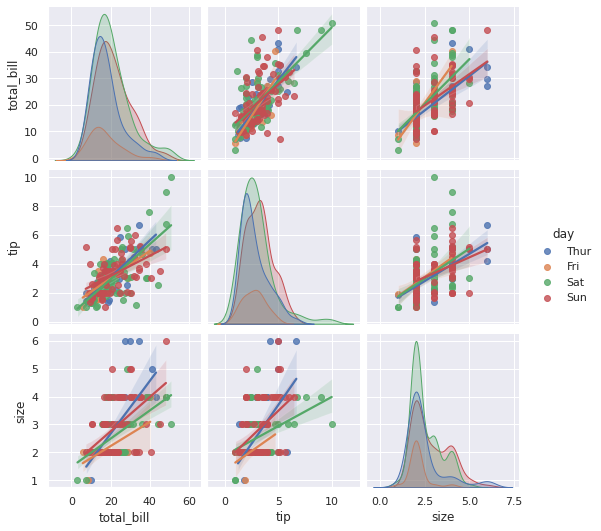

In [50]:
sns.pairplot(data =tips, hue = 'day', kind='reg') # day 기준으로 분류해서 수치값인 나머지 Column들을 그래프에 그린다

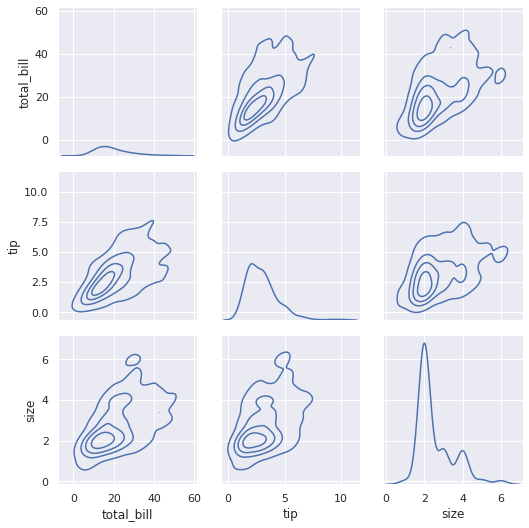

In [54]:
g = sns.PairGrid(tips)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=5);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

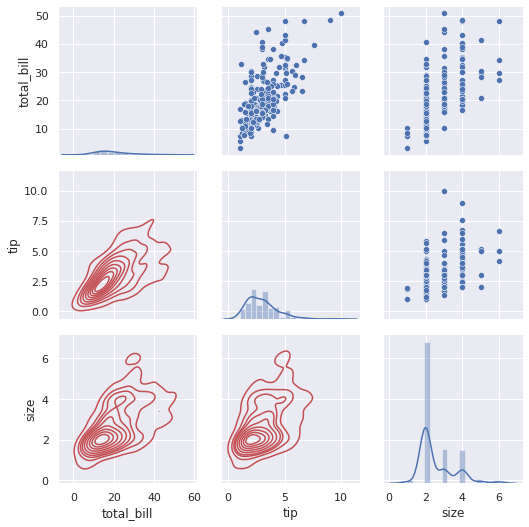

In [55]:
g= sns.PairGrid(tips)
g.map_diag(sns.distplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors='C3')

nidgeplot

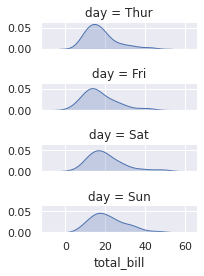

In [58]:
g = sns.FacetGrid(tips, row='day', height=1, aspect=3)
g.map(sns.kdeplot, 'total_bill',shade=True)

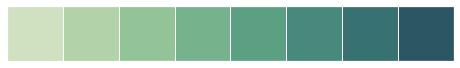